### Twitter Sentiment Analysis of Covid-19
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
There are worldwide curfews, quarantines and lockdown established to prevent further spread of the virus.
The basic agenda for this project is to use the #tags and other twitter components to analyse the behaviour of the indian citizens towards the overall situation of the lockdown.
Timeline of lockdown :
Phase 1 : 25 March – 14 April
Phase 2 : 15 April – 3 May
Phase 3 : 4 May – 17 May
Phase 4 : 18 May – 31 May
Phase 5 : 1 June – 30 June

We will be analyzing the tweets on 16th April,2020 i.e a day after Phase-2 was declared.

### Importing Packages

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
pip install wordcloud


     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import wordcloud


### Reading Data

In [6]:
# Reading data
df=pd.read_csv('2020-04-16 Coronavirus Tweets.CSV')
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1250574628726214658,817072420947247104,2020-04-16T00:00:00Z,Tu_IMSS_Coah,"Para complementar la higiene de tus manos, el ...",TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,1671,169,NaN,2017-01-05T18:17:00Z,False,es
1,1250574627127975938,44728980,2020-04-16T00:00:00Z,ANCALERTS,PWDs from Tahanang Walang Hagdan get aid amid ...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,4915788,775,NaN,2009-06-04T21:26:24Z,True,tl
2,1250574628671467521,1235017593649418241,2020-04-16T00:00:00Z,julycio,#France ได้รับความทุกข์ทรมานจาก # ชุดการแยกตัว...,Twitter for Advertisers,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,43,266,NaN,2020-03-04T01:43:19Z,False,th
3,1250574628575010816,92174767,2020-04-16T00:00:00Z,DZMMTeleRadyo,Target ng Department of Health na magkaroon ng...,TweetDeck,NaN,NaN,NaN,False,...,3,NaN,NaN,NaN,1372231,161,NaN,2009-11-24T02:03:16Z,True,tl
4,1250574628201717760,1042498579909107712,2020-04-16T00:00:00Z,ContraReplicaMX,La @SSalud_mx lanzó una nueva convocatoria esp...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,13474,2557,NaN,2018-09-19T19:40:04Z,False,es


In [7]:
# display columns
df.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

### Cleaning Data

In [8]:
# dropping columns
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','verified'],axis=1, inplace = True)
tweet.head()

,created_at,text,favourites_count,retweet_count,country_code,lang
0,2020-04-16T00:00:00Z,"Para complementar la higiene de tus manos, el ...",1828,2,NaN,es
1,2020-04-16T00:00:00Z,PWDs from Tahanang Walang Hagdan get aid amid ...,5449,1,NaN,tl
2,2020-04-16T00:00:00Z,#France ได้รับความทุกข์ทรมานจาก # ชุดการแยกตัว...,27,0,NaN,th
3,2020-04-16T00:00:00Z,Target ng Department of Health na magkaroon ng...,578,3,NaN,tl
4,2020-04-16T00:00:00Z,La @SSalud_mx lanzó una nueva convocatoria esp...,5743,0,NaN,es


In [9]:
# filtering data with 'country_code = IN' and 'language = en'
tweet =tweet[(tweet.country_code == "IN") & (tweet.lang == "en")].reset_index(drop = True)
tweet.drop(['country_code','lang'],axis=1,inplace=True)
tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-16T00:22:06Z,Interesting Read. A Four point strategy beyond...,841,0
1,2020-04-16T00:31:50Z,@Imamofpeace China sneezed - world freezed.\n\...,664,0
2,2020-04-16T00:33:14Z,"The poor in India are starving, the public is ...",5134,1
3,2020-04-16T00:40:40Z,We are not stuck at home we are safe at home.....,230,0
4,2020-04-16T00:50:40Z,I wish to contribute a little amount to our lo...,5,0


In [10]:
# created_at column
tweet["created_at"] = tweet["created_at"].apply(lambda i:(int(i.split("T")[1].split(":")[0])+int(i.split("T")[1].split(":")[1])/60))

In [11]:
# shape
tweet.shape

(1661, 4)

In [12]:
# check missing values
tweet.isna().sum()

created_at          0
text                0
favourites_count    0
retweet_count       0
dtype: int64

In [13]:
# data preprocessing
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    interesting read a four point strategy beyond ...
1    china sneezed world freezed covid 19 chinesevi...
2    the poor in india are starving the public is t...
3    we are not stuck at home we are safe at home s...
4    i wish to contribute a little amount to our lo...
Name: text, dtype: object

### Top 5 most retweeted tweets:

In [14]:
fav = tweet[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', fav['text'][i],'\n')

0 ] for the sake of the country please spell out the strategy as there is no vaccine or medicine for covid 19 

1 ] i do not want any credit i just want the people of the country to be free from covid 19 whether the government believes it or not we will continue to play the role of positive opposition and keep giving our suggestions ji rahulspeaksforindia 

2 ] the economic slowdown in the country is growing at a very rapid pace after covid19 the employment situation is deteriorating bjp government should help the poorest 20 of the people under the nyay scheme ji rahulspeaksforindia 

3 ] we are in a limbo right now i write my views on the covid 19 and it s impact on the economy in the business standard article read more covid 19 

4 ] lockdown is in no way a solution to the covid19 lockdown is like a pause button when we come out of the lockdown the virus is going to start its work again congress leader rahul gandhi rahulspeaksforindia 



### Top 5 most favourited tweets:

In [15]:
retweet = tweet[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', retweet['text'][i],'\n')

0 ] a 25 member team from the kottayam medical college who were a part of the team treating 5 patients including a 93 year old headed to kasargod for strengthening the functioning of the state of the art covid hospital covid19 covidkerala keralafightscovid 

1 ] because hunger cannot wait join us in our mission to protect vulnerable groups donate at beatthevirus covid19 coronarelief 

2 ] after one month of fighting againt covid19 he has came with strategic 

3 ] ajayks sant shri asharamji bapu established yuwa seva sangh mahila utthan mandal these organizations provide food or basic essentials to poor peoples at this critical time of coronaviruspandemic 

4 ] sober press conference by on covid19 did not get into a blame game mode and refrained from blaming modi in person and ensured that pc does not turn into us vs them match 



### Number of Tweets/Hour

Text(0.5, 1.0, 'No. of Tweets per Hour')

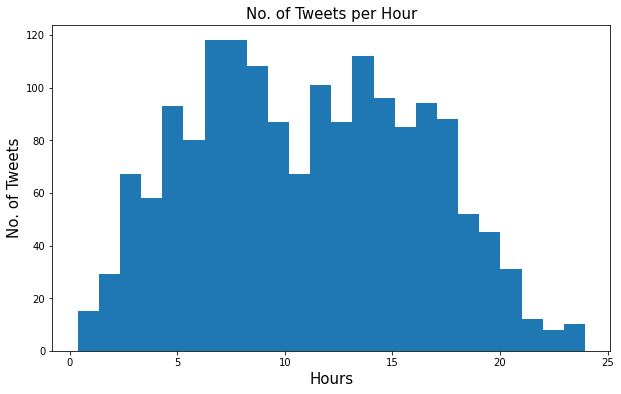

In [16]:
plt.figure(1, figsize=(10,6))
plt.hist(tweet["created_at"],bins = 24);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)

### Word Cloud :

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                          max_font_size=40, font_path='arial.ttf').generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size=25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


In [24]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

### Analyzing Text for Sentiment

##### Analyzing text using TextBlob to predict the sentiment of the text and categorise it as 'Positive', 'Negative' or 'Neutral'

In [25]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity
0,0.366667,interesting read a four point strategy beyond ...,841,0,positive,0.333333
1,0.516667,china sneezed world freezed covid 19 chinesevi...,664,0,neutral,0
2,0.550000,the poor in india are starving the public is t...,5134,1,negative,-0.209375
3,0.666667,we are not stuck at home we are safe at home s...,230,0,positive,0.675
4,0.833333,i wish to contribute a little amount to our lo...,5,0,positive,0.304167


positive    875
neutral     525
negative    261
Name: sentiment, dtype: int64


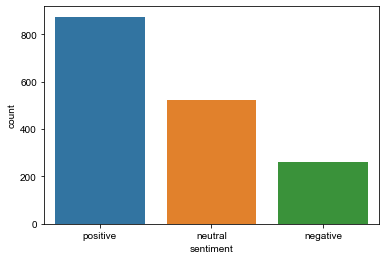

In [26]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

### Sentiment Distribution

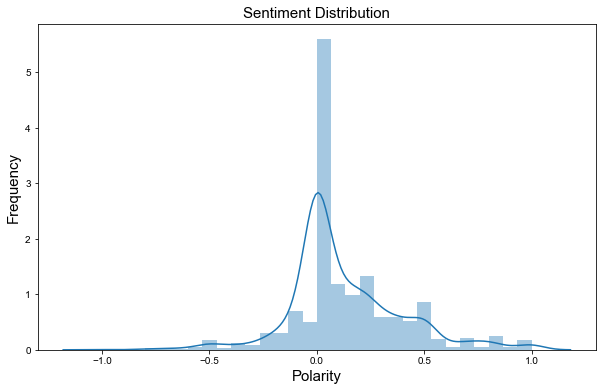

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

In [29]:
count = pd.DataFrame(tweet.groupby('sentiment')['favourites_count'].sum())
count.head()

,favourites_count
sentiment,
negative,2224842
neutral,3830762
positive,7396082


### Most frequently appearing words

In [30]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [31]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,the,1157
1,to,1021
2,covid,841
3,of,806
4,19,755


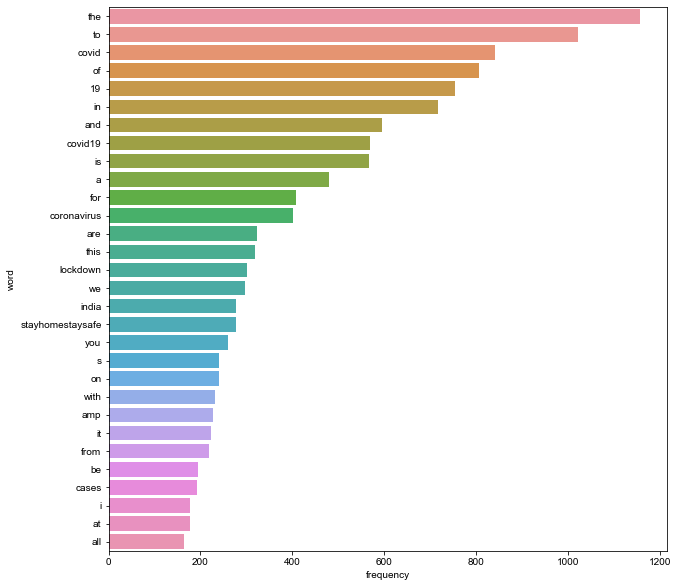

In [32]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [33]:
tweet.to_csv('tweet.csv',index=False)

### Conclusion
##### We can conclude that mostly people have a positive and neutral sentiment towards the start of Lockdown-2.